In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]

In [38]:
# Load data text file (in V/m)
data = np.loadtxt('e-field.txt', skiprows=2)
pos_x_import = data[:,0]
pos_y_import = data[:,1]
pos_z_import = data[:,2]
field_re_x_import = data[:,3]
field_re_y_import = data[:,4]
field_re_z_import = data[:,5]
field_im_x_import = data[:,6]
field_im_y_import = data[:,7]
field_im_z_import = data[:,8]

# Select data for plots: Use Y as X, and Z as Y
pos_x = pos_y_import
pos_y = pos_z_import
field_re_x = field_re_y_import
field_im_x = field_im_y_import
field_re_y = field_re_z_import
field_im_y = field_im_z_import
field_re_z = field_re_x_import
field_im_z = field_im_x_import

# Clean up data
   # Set origin to [0,0]
pos_x -= np.min(pos_x)
pos_y -= np.min(pos_y)

# Useful parameters
size_x = np.size(np.unique(pos_x))
size_y = np.size(np.unique(pos_y))
num_points = np.size(pos_x)

# Print info
print('Axis, x:\t min=', np.min(pos_x), ',\t max=', np.max(pos_x), 
      ',\t range=', np.max(pos_x)-np.min(pos_x), ',\t unique values=', size_x)
print('Axis, y:\t min=', np.min(pos_y), ',\t max=', np.max(pos_y), 
      ',\t range=', np.max(pos_y)-np.min(pos_y), ',\t unique values=', size_y)

print('Field (real), x: min=', np.min(field_re_x), ',\t max=', np.max(field_re_x),
      ',\t range=', np.max(field_re_x)-np.min(field_re_x))
print('Field (real), y: min=', np.min(field_re_y), ',\t max=', np.max(field_re_y),
      ',\t range=', np.max(field_re_y)-np.min(field_re_y))

Axis, x:	 min= 0.0 ,	 max= 200.0 ,	 range= 200.0 ,	 unique values= 201
Axis, y:	 min= 0.0 ,	 max= 250.0 ,	 range= 250.0 ,	 unique values= 251
Field (real), x: min= -1637960.0 ,	 max= 1514400.0 ,	 range= 3152360.0
Field (real), y: min= -662209.0 ,	 max= 693536.0 ,	 range= 1355745.0


### Normalise the field to the zero-point electric field

\begin{equation*}
\hbar \omega_c = \int \epsilon(r) \, |E(r)^2| \, d^2r
\end{equation*}

In [49]:
# Convert position arrays into vectors
stepsize = 1
x,y = np.mgrid[np.min(pos_x):np.max(pos_x)+stepsize:stepsize,
               np.min(pos_y):np.max(pos_y)+stepsize:stepsize]
# Convert field arrays in vectors
field_mag = np.zeros([size_x, size_y])
field_re_x_vec = np.zeros([size_x, size_y])
field_im_x_vec = np.zeros([size_x, size_y])
field_re_y_vec = np.zeros([size_x, size_y])
field_im_y_vec = np.zeros([size_x, size_y])
field_re_z_vec = np.zeros([size_x, size_y])
field_im_z_vec = np.zeros([size_x, size_y])
i = num_points-1
for y_i in np.arange(0, size_y, 1):
    for x_i in np.arange(0, size_x, 1):
        field_re_x_vec[x_i, y_i] = field_re_x[i]
        field_im_x_vec[x_i, y_i] = field_im_x[i]
        field_re_y_vec[x_i, y_i] = field_re_y[i]
        field_im_y_vec[x_i, y_i] = field_im_y[i]
        field_re_z_vec[x_i, y_i] = field_re_z[i]
        field_im_z_vec[x_i, y_i] = field_im_z[i]
        i-=1
        
field_mag = np.sqrt(field_re_x_vec**2 + field_re_y_vec**2 + field_re_z_vec**2)       

# Integrate zero-point electric field
resonator_len = 7145 # micrometer
num_photons = 0
frequency = 20.5 * 10**9
epsilon_r_silicon = 11.68
epsilon_0 = 8.85418782 * 10**-12
epsilon = np.ones_like(field_mag) * epsilon_0
epsilon[:,0:100] *= epsilon_r_silicon
integral_slice_max = np.sum( epsilon * field_mag**2 * (stepsize*10**-6)**3 )
z_weighting = np.cos(np.linspace(0, np.pi/2, resonator_len/stepsize))
integral_full = np.sum(integral_slice_max * z_weighting)
field_norm = np.sqrt( integral_full / (hbar * 2 * pi * frequency * (num_photons + 0.5)) )
field_mag = field_mag / field_norm

# Crop data [xmin,xmax,ymin,ymax]
crop = [70,70,100,100]
x = x[crop[0]:-crop[1],crop[2]:-crop[3]]
y = y[crop[0]:-crop[1],crop[2]:-crop[3]]
field_mag = field_mag[crop[0]:-crop[1],crop[2]:-crop[3]]
field_re_x_vec = field_re_x_vec[crop[0]:-crop[1],crop[2]:-crop[3]]
field_re_y_vec = field_re_y_vec[crop[0]:-crop[1],crop[2]:-crop[3]]

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


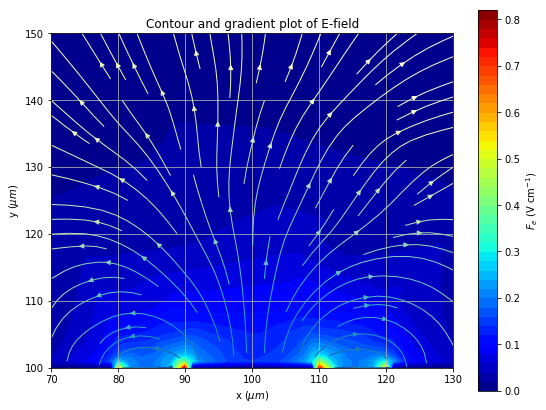

In [52]:
# Gradient plot
ncontours = 50 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

plt.figure(figsize=(9,7))
plt.contourf(x,y,field_mag,ncontours,cmap=plt.cm.jet, interpolation='log')
cbar = plt.colorbar(label='$F_{e}$ (V cm$^{-1}$)')
#plt.imshow(np.log(np.transpose(field_mag)), interpolation='none', origin='lower', cmap=plt.cm.YlGnBu,
#           extent=(np.min(x),np.max(x),np.min(y),np.max(y)) )
plt.streamplot(np.transpose(x),np.transpose(y),np.transpose(field_re_x_vec),np.transpose(field_re_y_vec),
              color=np.log(np.transpose(field_mag)), linewidth=1, cmap=plt.cm.YlGnBu, density=0.8)
plt.grid()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([crop[0],size_x-1-crop[1],crop[2],size_y-1-crop[3]]) # specify xlim,ylim
plt.title("Contour and gradient plot of E-field")
plt.xlabel("x ($\mu m$)")
plt.ylabel("y ($\mu m$)")

### Coupling, g

Transition dipole moment:  3576.83566428  (a.u.)


C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log


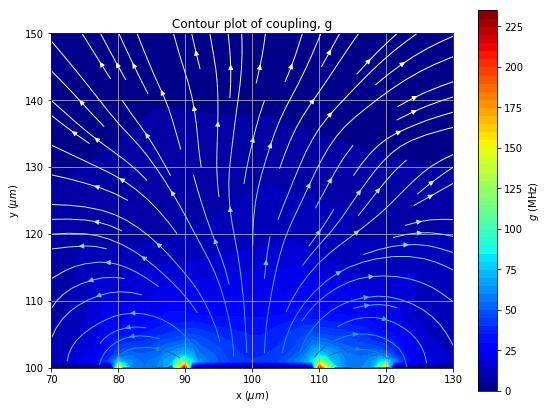

In [98]:
# Gradient plot
ncontours = 50 # the number of (equally spaced) contour lines to plot. Leave this out to just use the default value

n_1, l_1, m_1 = 71, 70, 70
n_2, l_2, m_2 = 72, 71, 71
transition_dipole_moment = np.abs(
    stark_int(n_1, n_2, l_1, l_2, m_1, m_2, field_orientation='parallel')) * e*a_0 # in atomic units e a_0
print('Transition dipole moment: ', transition_dipole_moment/(e*a_0), ' (a.u.)')

g_map = ( (transition_dipole_moment * field_mag) / hbar ) * 10**-6

plt.figure(figsize=(9,7))
plt.contourf(x,y,g_map,ncontours,cmap=plt.cm.jet, interpolation='log')
cbar = plt.colorbar(label='$g$ (MHz)')
plt.streamplot(np.transpose(x),np.transpose(y),np.transpose(field_re_x_vec),np.transpose(field_re_y_vec),
              color=np.log(np.transpose(field_mag)), linewidth=1, cmap=plt.cm.YlGnBu, density=0.8)

plt.grid()
plt.axis('scaled') # aspect ratio 1:1
plt.axis([crop[0],size_x-1-crop[1],crop[2],size_y-1-crop[3]]) # specify xlim,ylim
plt.title("Contour plot of coupling, g")
plt.xlabel("x ($\mu m$)")
plt.ylabel("y ($\mu m$)")

filename = "g_map.eps"
directory = '.'
fileout = os.path.join(directory, filename)
plt.savefig(fileout)

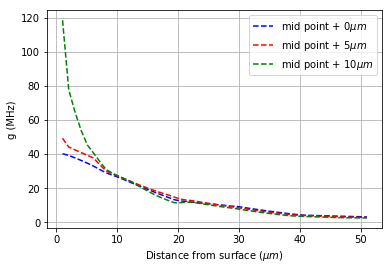

In [97]:
y_start, y_end = 1, 51

x_pos = 30
plt.plot(np.linspace(y_start,y_end,y_end-y_start), g_map[x_pos,y_start:y_end], '--b', label='mid point + $0 \mu m$')
x_pos = 35
plt.plot(np.linspace(y_start,y_end,y_end-y_start), g_map[x_pos,y_start:y_end], '--r', label='mid point + $5 \mu m$')
x_pos = 40
plt.plot(np.linspace(y_start,y_end,y_end-y_start), g_map[x_pos,y_start:y_end], '--g', label='mid point + $10 \mu m$')

plt.legend()
plt.grid()
plt.xlabel('Distance from surface ($\mu m$)')
plt.ylabel('g (MHz)')

filename = "g_map_cross_section.svg"
directory = '.'
fileout = os.path.join(directory, filename)
plt.savefig(fileout)

In [101]:
# Number of Rabi oscillations
resonator_len = 5000 * 10**-6 # m
atom_velocity = 3000 # m/s
interaction_time = resonator_len / atom_velocity # x=vt in s
rabi_freq = 30 * 10**6 # Hz
num_osc = rabi_freq * interaction_time # n = ft
print('Number of rabi oscillations: ', num_osc)

Number of rabi oscillations:  50.0
